<a href="https://colab.research.google.com/github/RG-Hipolito/-CSST106-CS4A/blob/main/4A_HIPOLITO_EXER3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [92]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import exposure

!pip install opencv-python matplotlib

from PIL import Image
from io import BytesIO

# Function to display an image using matplotlib
def display_image(img, title="Image"):
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.axis('off')
  plt.show()

# Exercise 1: Harris Corner Detection

## Load an image of your choice.

Saving IMG_20241023_153405.jpg to IMG_20241023_153405.jpg


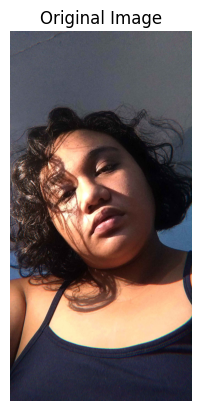

In [4]:
#Taken from EXER1

# Upload an image
uploaded = files.upload()
# Convert to OpenCV format
image_path = next(iter(uploaded)) # Get the image file name
image = Image.open(BytesIO(uploaded[image_path]))
image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
display_image(image, "Original Image")



## Convert it to grayscale.

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

## Apply the Harris Corner Detection method to detect corners.

In [ ]:
harris_corners = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

harris_corners = cv2.dilate(harris_corners, None)

threshold = 0.01 * harris_corners.max()
image[harris_corners > threshold] = [0, 0, 250]  # Mark corners in red

## Visualize the corners on the image and display the result.

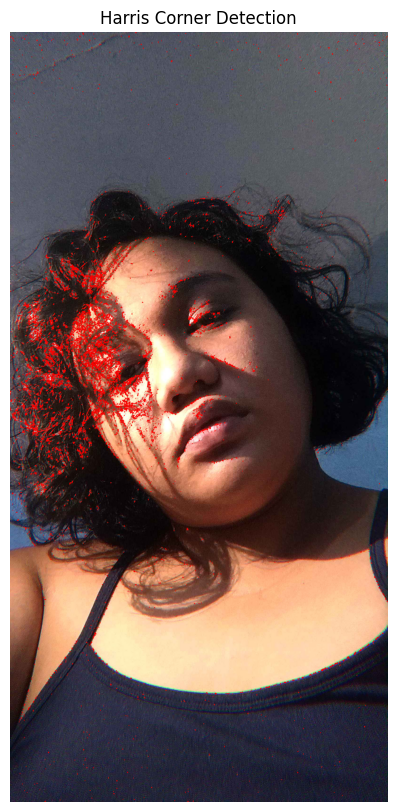

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.axis('off')
plt.show()

# Exercise 2: HOG (Histogram of Oriented Gradients) Feature Extraction

## Load an image of a person or any object.

Saving spring-pictures-By-Mykhailo-Sherman--1500x1000.jpeg to spring-pictures-By-Mykhailo-Sherman--1500x1000.jpeg


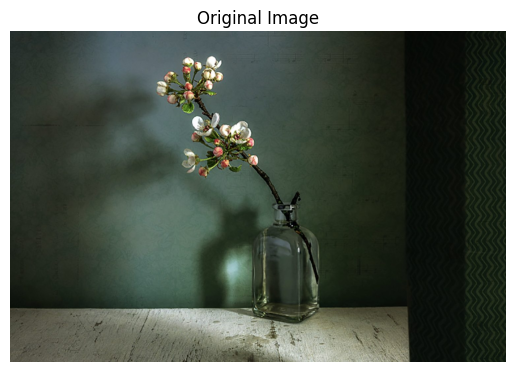

In [ ]:
#Taken from EXER1

# Upload an image
uploaded = files.upload()
# Convert to OpenCV format
image_path = next(iter(uploaded)) # Get the image file name
image = Image.open(BytesIO(uploaded[image_path]))
image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
display_image(image, "Original Image")

## Convert it to grayscale.

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

## Apply the HOG descriptor to extract features.

In [ ]:

hog_features, hog_image = hog(gray, orientations=0, pixels_per_cell=(10, 10), cells_per_block=(4, 2), visualize=True, channel_axis=None)


## Visualize the gradient orientations on the image

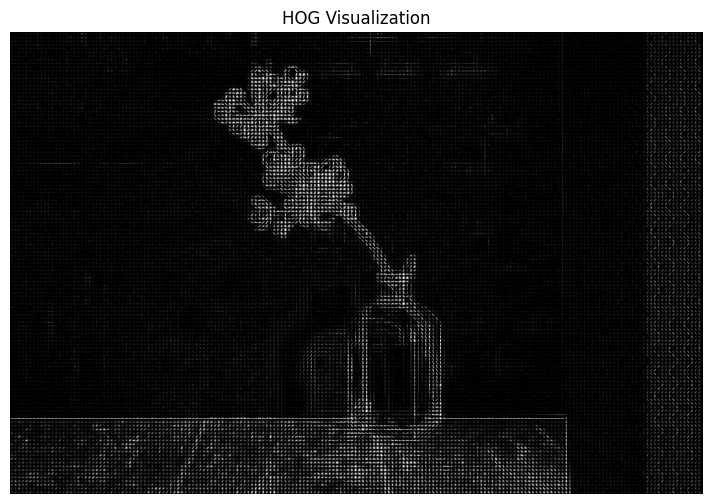

In [ ]:
fig, (hogvis) = plt.subplots(figsize=(12, 6), sharex=True, sharey=True)
hogvis.axis('off')
hogvis.imshow(hog_image_rescaled, cmap='gray')
hogvis.set_title('HOG Visualization')
plt.show()

# Exercise 3: FAST (Features from Accelerated Segment Test) Keypoint Detection

## Load an image of a person or any object.

Saving spring-pictures-By-Mykhailo-Sherman--1500x1000.jpeg to spring-pictures-By-Mykhailo-Sherman--1500x1000.jpeg


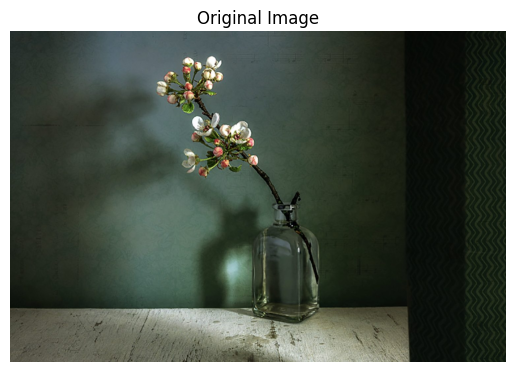

In [7]:
#Taken from EXER1

# Upload an image
uploaded = files.upload()
# Convert to OpenCV format
image_path = next(iter(uploaded)) # Get the image file name
image = Image.open(BytesIO(uploaded[image_path]))
image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
display_image(image, "Original Image")

## Convert it to grayscale.

In [8]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

## Apply the FAST algorithm to detect keypoints.

In [9]:
# Step 3: Initialize the FAST detector
fast_detector = cv2.FastFeatureDetector_create()

keypoints = fast_detector.detect(gray, None)

image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


## Visualize the keypoints on the image and display the result.

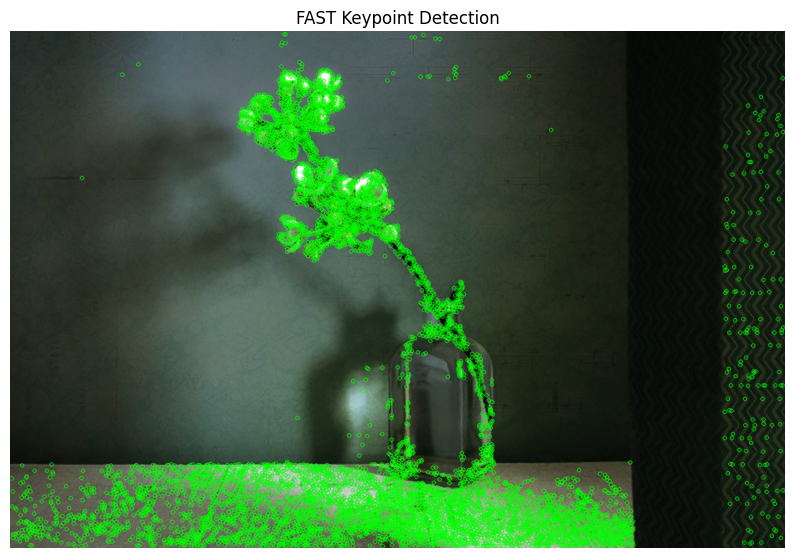

In [10]:
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB for display in matplotlib
plt.title('FAST Keypoint Detection')
plt.axis('off')  # Hide axis
plt.show()

# Exercise 4: Feature Matching using ORB and FLANN

## Load an image of a person or any object.

In [26]:
from google.colab import files

#Select two images at once.
uploaded = files.upload()

image_paths = list(uploaded.keys())
if len(image_paths) < 2:
    print("Please upload two images.")
else:
    # Load images using OpenCV
    image1 = cv2.imdecode(np.frombuffer(uploaded[image_paths[0]], np.uint8), cv2.IMREAD_COLOR)
    image2 = cv2.imdecode(np.frombuffer(uploaded[image_paths[1]], np.uint8), cv2.IMREAD_COLOR)

Saving Michelangelos_David-florence-sightseeing.jpg to Michelangelos_David-florence-sightseeing (7).jpg
Saving ap23087499133850_custom-f1634bc4ff79e84b2e9b79d28e73f7b740ec40e4.jpg to ap23087499133850_custom-f1634bc4ff79e84b2e9b79d28e73f7b740ec40e4.jpg


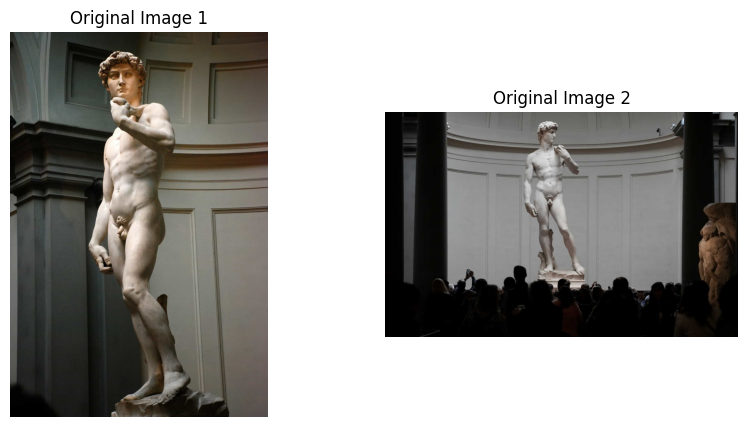

In [27]:
#A seperate display images function for this comparison
def display_images(img1, img2, title=""):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.title(f'{title} 1')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.title(f'{title} 2')
    plt.axis('off')

    plt.show()

# Use the function to display image1 and image2
display_images(image1, image2, "Original Image")

## Convert it to grayscale.

In [28]:
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

## Extract keypoints and descriptors using ORB

In [29]:
orb = cv2.ORB_create()

#Keypoints and compute descriptors
keypoints1, descriptors1 = orb.detectAndCompute(gray1, None)
keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)

## Match features between the two images using the FLANN matcher

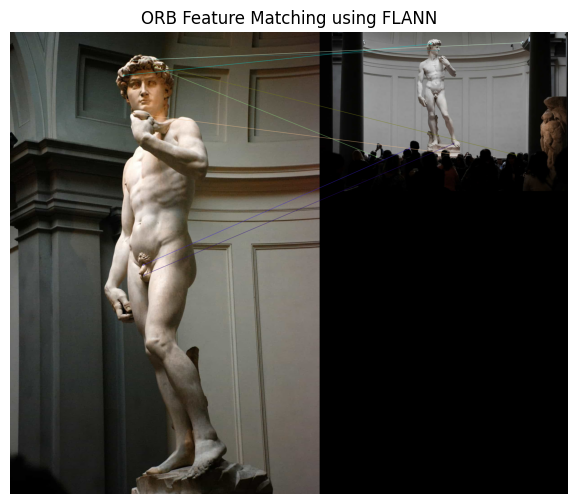

In [30]:
#FLANN matcher
index_params = dict(algorithm=6, trees=5)  # Using KDTree algorithm
search_params = dict(checks=50)  # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params, search_params)

#Match features
matches = flann.knnMatch(descriptors1, descriptors2, k=2)

#Filter matches using Lowe's ratio test, only when there are two neighbors
good_matches = []
for pair in matches:
    if len(pair) == 2:  # Ensure there are two matches
        m, n = pair
        if m.distance < 0.7 * n.distance:  # Apply Lowe's ratio test
            good_matches.append(m)

#Draw matches
matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)



## Display the matched features.

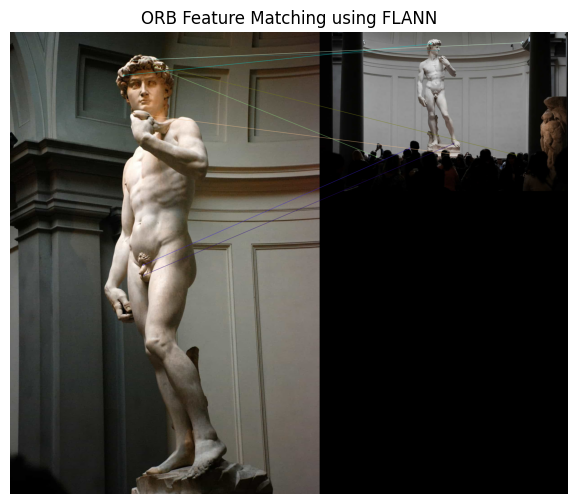

In [31]:
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
plt.title('ORB Feature Matching using FLANN')
plt.axis('off')
plt.show()

# Exercise 5: Image Segmentation using Watershed Algorithm

In [120]:
import numpy as np
import cv2 as cv2
from matplotlib import pyplot as plt
from google.colab import files

# Step 1: Upload and Load Image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]  # Get the first uploaded image
img = cv2.imread(image_path)
assert img is not None, "file could not be read, check with os.path.exists()"

Saving Green_apple_gen.png to Green_apple_gen (2).png


## Convert it to grayscale.

In [121]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


## Apply a threshold to convert the image to binary

In [122]:
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

## Apply the Watershed algorithm to segment the image into regions.

In [128]:
# Noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# Sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img[markers == -1] = [0,0,255]

## Visualize and display the segmented regions

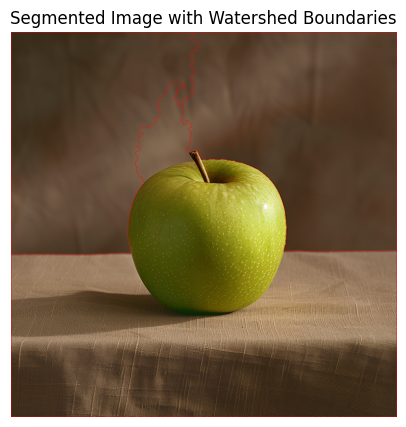

In [130]:
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Segmented Image with Watershed Boundaries")
plt.axis('off')
plt.show()